In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (18.5 MB/s)
debconf: unable to initia

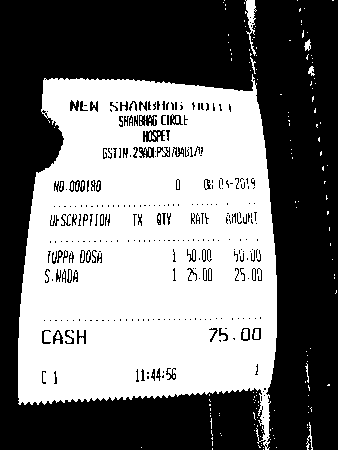

In [17]:
# importing modules
from google.colab.patches import cv2_imshow
import cv2
import pytesseract
 # reading image using opencv

image = cv2.imread('bill.jpg')

 #converting image into gray scale image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 # converting it to binary image by Thresholding

 # this step is require if you have colored image because if you skip this part

 # then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

cv2_imshow(threshold_img)

In [18]:
 #configuring parameters for tesseract
import pytesseract
from pytesseract import Output
custom_config = r'-l eng --oem 1 --psm 6 '

 # now feeding image to tesseract

details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config)

print(details.keys())
print(details)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
{'level': [1, 2, 3, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4

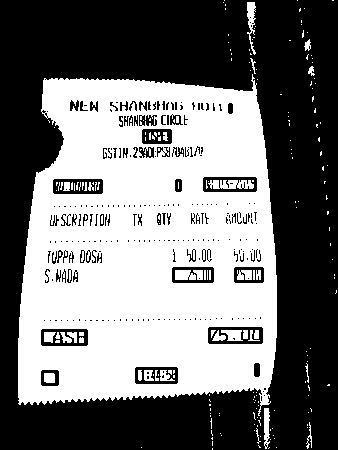

In [19]:
total_boxes = len(details['text'])

for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >30:
    (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
    threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(threshold_img)

In [20]:
parse_text = []

word_list = []

last_word = ''

for word in details['text']:
  if word!='':
    word_list.append(word)
    last_word = word
  if (last_word!='' and word == '') or (word==details['text'][-1]):
    parse_text.append(word_list)
    word_list = []

In [21]:
import csv

with open('result_text.txt',  'w', newline="") as file:
  csv.writer(file, delimiter=" ").writerows(parse_text)

In [22]:
print(parse_text)
#print(parse_text)

[['p'], ['\\', 'iy'], ['a'], ['i'], ['J', 'ONEM', 'SHANEHOLS', 'H041', '4', 'if'], ['b', 'HANES', 'CIRDLE', 'yo'], ['HT', ';'], ['STN.', '23APSUAOALLAP', 'D'], ['4.000180', '0', 'Bests', 'y'], ['UESCRIPHION', 'TK', 'OIY', 'RT', 'aM', '4'], ['‘Ppa', 'D0SA', '1', 'Y.OL', 'i', ':'], ['SAAD', '130', '3.0'], ['CASH', '75.00'], ['Ci', '114456', 'i', '1)'], ['on', 'a']]


**image to hocr and xml**

In [23]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

In [25]:
img = cv2.imread("bill.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [27]:
custom_config = r'-l eng --oem 1 --psm 6 '
d = pytesseract.image_to_data(thresh, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)
print(d)
df

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,338,450,-1,
1,2,1,1,0,0,0,42,0,289,450,-1,
2,3,1,1,1,0,0,42,0,289,450,-1,
3,4,1,1,1,1,0,301,20,3,18,-1,
4,5,1,1,1,1,1,301,20,3,18,0,p
...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,1,1,1,13,3,255,364,3,11,42,i
60,5,1,1,1,13,4,305,363,25,23,17,1)
61,4,1,1,1,14,0,210,407,103,43,-1,
62,5,1,1,1,14,1,210,408,46,28,27,on


In [28]:
custom_config = r'-l eng --oem 1 --psm 6 '
img = cv2.imread("bill.jpg")
#d = pytesseract.image_to_pdf_or_hocr(thresh,lang="eng", extension='hocr', config=custom_config)
d = pytesseract.image_to_pdf_or_hocr(img,lang="eng", extension='hocr', config=custom_config)
print(d)

b'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n <head>\n  <title></title>\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\n  <meta name=\'ocr-system\' content=\'tesseract 4.0.0-beta.1\' />\n  <meta name=\'ocr-capabilities\' content=\'ocr_page ocr_carea ocr_par ocr_line ocrx_word\'/>\n</head>\n<body>\n  <div class=\'ocr_page\' id=\'page_1\' title=\'image "/tmp/tess_iefqcsyi_input.PNG"; bbox 0 0 338 450; ppageno 0\'>\n   <div class=\'ocr_carea\' id=\'block_1_1\' title="bbox 54 180 101 192">\n    <p class=\'ocr_par\' id=\'par_1_1\' lang=\'eng\' title="bbox 54 180 101 192">\n     <span class=\'ocr_line\' id=\'line_1_1\' title="bbox 54 180 101 192; baseline 0 0; x_size 16; x_descenders 4; x_ascenders 4"><span class=\'ocrx_word\' id=\'word_1_1\' title=\'bbox 54 180 101 192; x_wconf

In [29]:
with open('test.xml', 'w+b') as f:
    f.write(d)

In [35]:
import xml.etree.cElementTree as ElementTree

tree = ElementTree.Element('tmx', {'version': '1.4a'})
ElementTree.SubElement(tree, 'header', {'adminlang': 'EN'})
ElementTree.SubElement(tree, 'body')

with open('myfile.tmx', 'wb') as f:
    f.write('<?xml version="1.0" encoding="UTF-8" ?><!DOCTYPE tmx SYSTEM "tmx14a.dtd">'.encode('utf8'))
    ElementTree.ElementTree(tree).write(f, 'utf-8')